<b> This notebook will contain different experiments for training our models with our data.  </b>

In [1]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the file
df = pd.read_csv("dataset.csv")

In [3]:
print(df.shape)
df.head()

(400, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# these are our categorical and numerical features
categorical_features = ['University Rating', 'Research', 'SOP', 'LOR ']
numerical_features = ['GRE Score', 'TOEFL Score', 'CGPA']

<b> Since we only have 400 rows of data, we will first randomly split the data to get an independent test dataset to evaluate the model performance.

In [5]:
# dropping this useless column.
df.drop("Serial No.", axis = 1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state=42, test_size=100/400) # get 100 random rows for testing

In [7]:
# tranining dataframe
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
247,311,104,2,2.5,3.5,8.48,0,0.71
110,305,108,5,3.0,3.0,8.48,0,0.61
16,317,107,3,4.0,3.0,8.70,0,0.66
66,327,114,3,3.0,3.0,9.02,0,0.61
153,324,105,3,3.0,4.0,8.75,0,0.79


In [8]:
# testing dataframe
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
209,301,104,3,3.5,4.0,8.12,1,0.68
280,311,102,3,4.5,4.0,8.64,1,0.68
33,340,114,5,4.0,4.0,9.60,1,0.90
210,325,108,4,4.5,4.0,9.06,1,0.79
93,301,97,2,3.0,3.0,7.88,1,0.44


# Data Standardization
<b> for numerical features </b>

Through our data analysis, we found out that our features have different scales. The scale of GRE score and TOEFL score, and CGPA is very different. If we were to provide this features to our model, the features with larger scale would unequally impact the model. Therefore, we standarize the feature using Standard Scaling, which will bring all features to a similar distribution with a mean close to 0 and a unit standard deviation.


The formula for feature standardization (also called Z-score normalization) is:

$$ z = \frac{x - \mu}{\sigma} $$

Where:
- $z$ is the standardized value
- $x$ is the original value
- $\mu$ is the mean of the feature
- $\sigma$ is the standard deviation of the feature


Since we will be applying K-fold cross validation while optimizing our model, we need to ensure that we don't scale the train dataframe at once, as Standardization should only apply to training data and not validation data. By calculating the mean and standard deviation of the training data, we normalize the features and apply the same mean and standard dev to do the same thing to validation and test data. Otherwise, there will be a problem of data leakage as our data (mean and std) from train dataframe will essentially be leaked to the validation/test data, which may not represent the true performance of model. We will use pipelines to perform Standardization and applying K-fold cross validation. 


# Encoding Categorical Features

Our Linear Regression model cannot work with categorical features by default. We would need to encode them. Two of the most common and simple encoding techniques would be `Label Encoding` and `One-Hot Encoding`. Since our categorical columns have integer/float values in ordinal fashion, we can simply skip this step for our dataset.

# Model Training with K-FOLD Cross Validation (Linear Regression)

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [68]:
target = 'Chance of Admit '

In [69]:
# X = df.drop(target, axis=1)
# y = df[target]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# model = LinearRegression()
# scaler = StandardScaler().fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

# model.fit(X_train, y_train)
# train_preds = model.predict(X_train)
# test_preds = model.predict(X_test)

# print(r2_score(train_preds, y_train))
# print(r2_score(test_preds, y_test))

In [70]:
features = train.columns[:-1]
target = train.columns[-1]

print("Features: ", features)
print("Target: ", target)

Features:  Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')
Target:  Chance of Admit 


In [71]:
# creating feature matrix and response/target vector
X_train = train[features]
y_train = train[target]

In [72]:
# this pipeline with scaler object will apply scaler to each train split only to calculate -
# mean and std, and use that to normalize ttrain and validation splits.

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)

    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [73]:
# k fold cross-validation
'''
Here, we select split=4 so that our dataset with 300 rows will be split 4 times (225:75) randomly and 
the subsplit will be used as train dataframe and validation dataframe
'''
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [74]:
# our results
# here, the scoring parameter will enable us to use the model with least correspodnig error 
kf_crossval_results = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

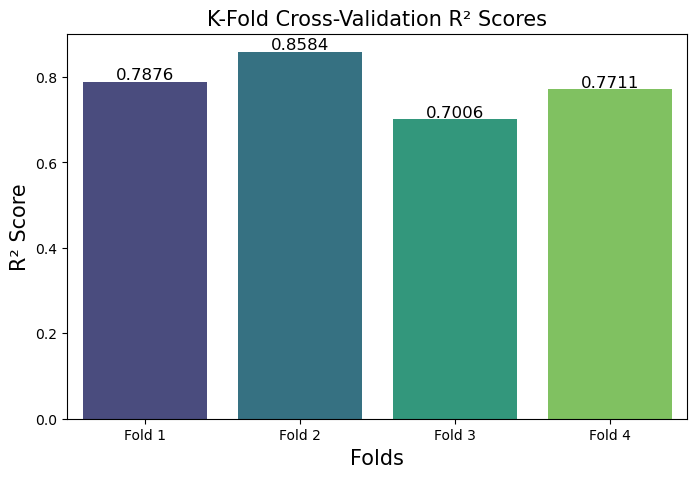

In [75]:
# Create a DataFrame with the fold numbers and R² scores
cv_results_df = pd.DataFrame({
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4'],
    'R²': kf_crossval_results
})

# Plotting using Seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Fold', y='R²', data=cv_results_df, palette='viridis')

# lets uss add the values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
plt.title('K-Fold Cross-Validation R² Scores', fontsize=15)
plt.xlabel('Folds', fontsize=15)
plt.ylabel('R² Score', fontsize=15)
plt.show()

Since we are not really optimizing hyperparameters and we already have a seperate independent test data, there is not really much to do with cross validation. But, even so, this technique helps us check model stability with differnet folds of validation set. We can see that for the second fold, the model has best R-squared on the fold's validation set. Perhaps, the model found that set easier to make predictions on. 

In [76]:
# training the model on entire data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'CGPA']),
                                                 ('cat', 'passthrough',
                                                  ['University Rating',
                                                   'Research', 'SOP',
                                                   'LOR '])])),
                ('model', LinearRegression())])

In [77]:
# lets make predictions on training and test samples
train_preds = pipeline.predict(X_train)
test_preds = pipeline.predict(test[features])

In [78]:
def evaluate_regression_model(y, y_pred):
    '''
    This function will evaluate the actual values and the corresponding predictions using various metridcs
    
    '''
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    metrics = {
        'Metric': ['R² Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'],
        'Value': [r2, mse, mae, rmse]
    }
    
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

In [79]:
evaluate_regression_model(y_train, train_preds)

,Metric,Value
0,R² Score,0.795885
1,Mean Squared Error (MSE),0.003912
2,Mean Absolute Error (MAE),0.043844
3,Root Mean Squared Error (RMSE),0.062549


In [80]:
evaluate_regression_model(test[target], test_preds)

,Metric,Value
0,R² Score,0.816115
1,Mean Squared Error (MSE),0.004341
2,Mean Absolute Error (MAE),0.047078
3,Root Mean Squared Error (RMSE),0.065885


This is a good start. The model has an R-squared of 0.79 on the test data.

In [81]:
our_model = pipeline.named_steps['model'];our_model

LinearRegression()

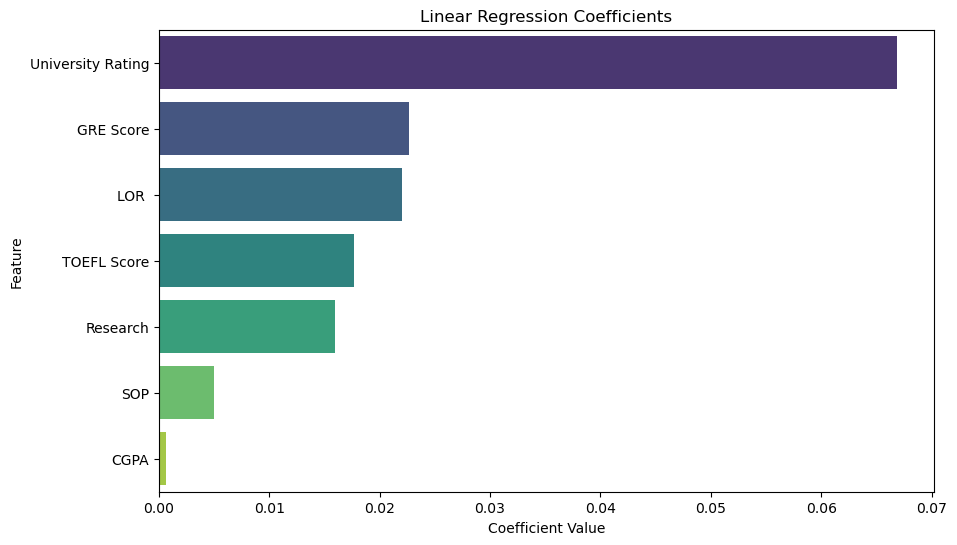

In [84]:
# Extract coefficients
coefficients = our_model.coef_
features = pipeline.feature_names_in_

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

coef_df.sort_values("Coefficient", ascending=False, inplace=True)

# Plot the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Linear Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

The coefficients are very important for interpreting linear regression. The coefficients that are positive indicate that with the increasing feature, the target also increases. Similarly, if the cofficient is negative, the increasing feature leads to decreasing target. If the coefficient is close to 0, then it represents that the feature is having no linera impact on the target.

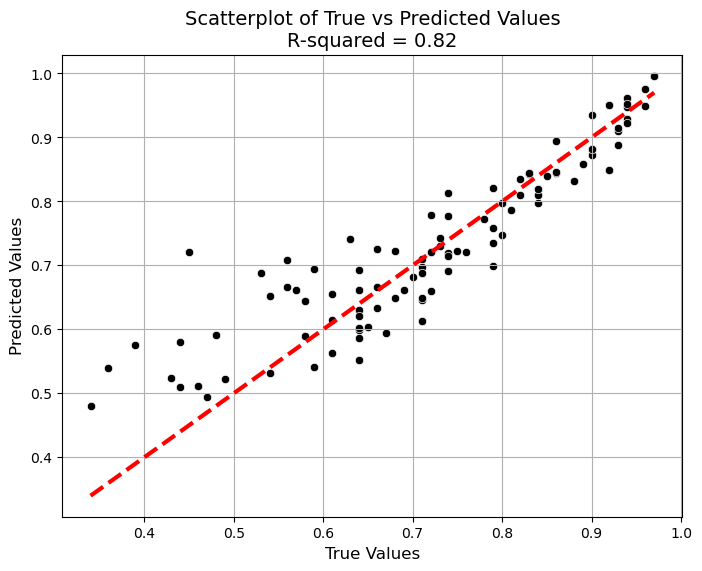

In [25]:
r_squared = r2_score(test[target], test_preds)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test[target], y=test_preds, color='black')
plt.title(f'Scatterplot of True vs Predicted Values\nR-squared = {r_squared:.2f}', fontsize=14)
plt.xlabel('True Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)

# let us addd a grid and a 45-degree reference line
plt.grid(True)
plt.plot([min(test[target]), max(test[target])], [min(test[target]), max(test[target])], 'r--', linewidth=3)
plt.show()

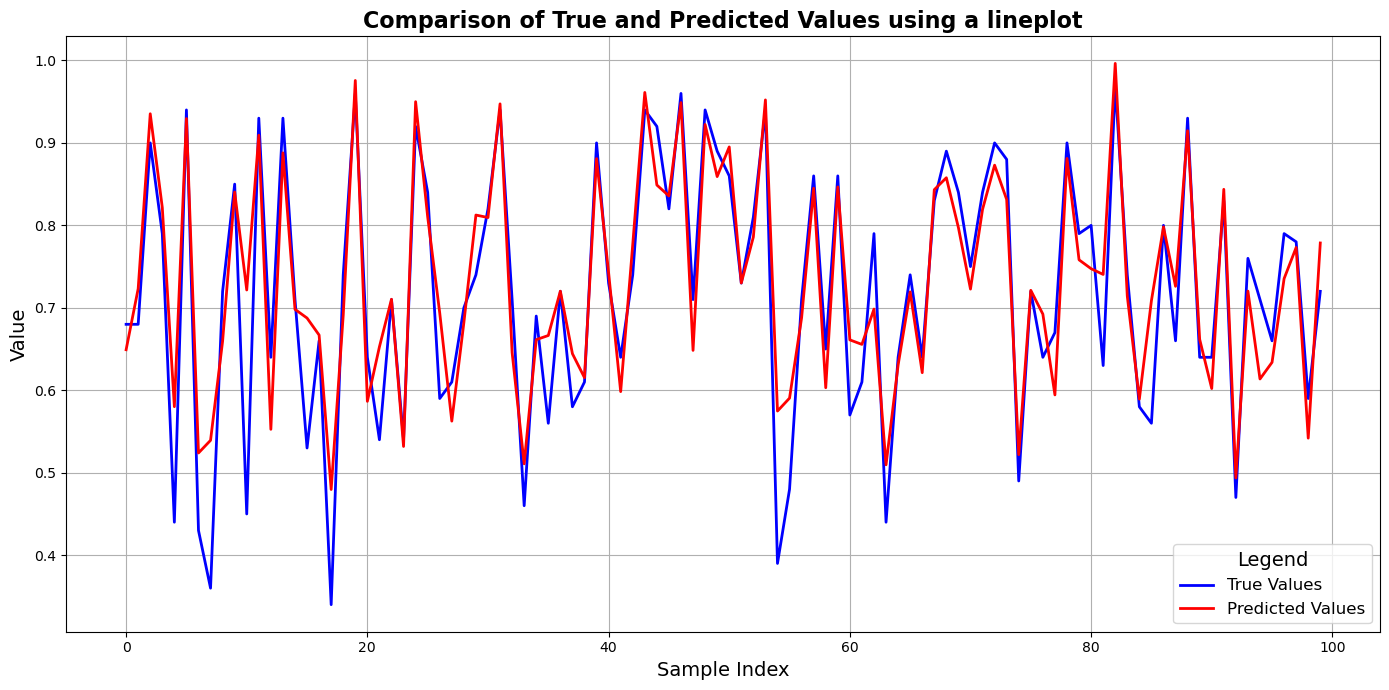

In [26]:
# Plot true values vs predicted values lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(test.shape[0]), y=test[target], color='blue', label='True Values', linewidth=2)
sns.lineplot(x=range(test.shape[0]), y=test_preds, color='red', label='Predicted Values', linewidth=2)
plt.title('Comparison of True and Predicted Values using a lineplot', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


# Saving the linear regression pipeline

In [27]:
import pickle

# Save the pipeline to a file
with open('linear_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [28]:
# Load the pipeline from the file
with open('linear_regression_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [29]:
evaluate_regression_model(test[target], loaded_pipeline.predict(test[features]))

,Metric,Value
0,R² Score,0.816115
1,Mean Squared Error (MSE),0.004341
2,Mean Absolute Error (MAE),0.047078
3,Root Mean Squared Error (RMSE),0.065885


We will load this pickled object in our streamlit app to perform realtime predictions.

In [30]:
a_single_sample = test.iloc[[44]][features]
a_single_sample

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1


In [31]:
print("Predicted chance of admit for this applicant: ", loaded_pipeline.predict(a_single_sample))

Predicted chance of admit for this applicant:  [0.84893303]


In [32]:
a_single_sample.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

# Polynomial Regression

In [33]:
# importing dependencies for polynomial regression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

In [34]:
# column transformer will essentially help us manipulate columns in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling numerical features only and -
        ('cat', 'passthrough', categorical_features)  # - leeaving categorical features as they are
    ])

### How does performance change with respect to the degree of the polynomial regression?

In [35]:
r2_train = []
r2_test = []
mae_train = []
mae_test = []

for deg in range(1, 6):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),  # Scaling the features
        ('poly', PolynomialFeatures(degree=deg, include_bias=True)),  # Polynomial feature transformation
        ('model', Ridge(alpha=1.0))  # Ridge regression for L2 regularization (alpha is the regularization strength)
    ])

    pipeline.fit(X_train, y_train)     # fitting on training data
    train_preds = pipeline.predict(X_train)     # making predictions on train data
    test_preds = pipeline.predict(test[features]) # making predictions on test data

    # appending training and testing r-squared and MAE for later comparision
    r2_train.append(r2_score(y_train, train_preds))
    r2_test.append(r2_score(test[target], test_preds))

    mae_train.append(mean_absolute_error(y_train, train_preds))
    mae_test.append(mean_absolute_error(test[target], test_preds))

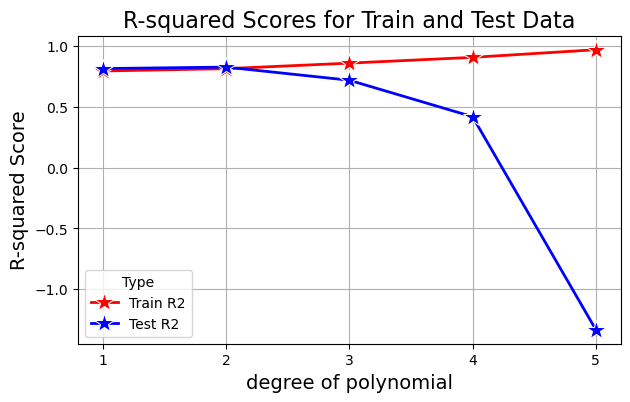

In [36]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=range(1, 6), y=r2_train, ax=ax, color='red', marker="*", linewidth=2, markersize=15, label='Train R2')
sns.lineplot(x=range(1, 6), y=r2_test, ax=ax, color="blue", marker="*", linewidth=2, markersize=15, label='Test R2')
ax.set_title('R-squared Scores for Train and Test Data', fontsize=16)
plt.xticks(range(1, 6))
ax.set_xlabel('degree of polynomial', fontsize=14)
ax.set_ylabel('R-squared Score', fontsize=14)
ax.grid(True)
ax.legend(title='Type')
plt.show()

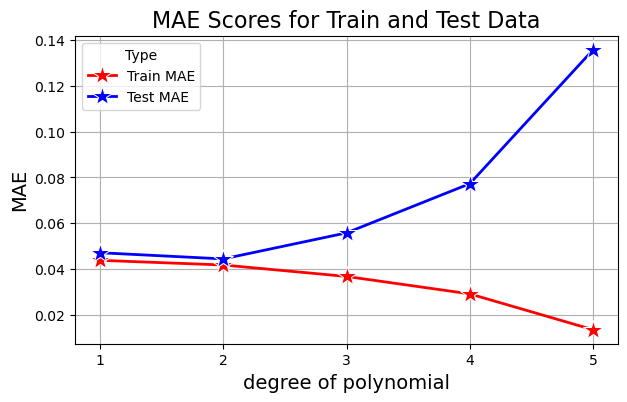

In [37]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.lineplot(x=range(1, 6), y=mae_train, ax=ax, color='red', marker="*", linewidth=2, markersize=15, label='Train MAE')
sns.lineplot(x=range(1, 6), y=mae_test, ax=ax, color="blue", marker="*", linewidth=2, markersize=15, label='Test MAE')
ax.set_title('MAE Scores for Train and Test Data', fontsize=16)
plt.xticks(range(1, 6))
ax.set_xlabel('degree of polynomial', fontsize=14)
ax.set_ylabel('MAE', fontsize=14)
ax.grid(True)
ax.legend(title='Type')
plt.show()

We can clearly see that, after two degrees, the polynomial regression is overfitting. Therefore, we will conclude with using the 2-deg polynomial regression.

In [38]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Scaling the features
    ('poly', PolynomialFeatures(degree=2, include_bias=True)),  # Polynomial feature transformation
    ('model', Ridge(alpha=1.0))  # Ridge regression for L2 regularization (alpha is the regularization strength)
])

# fitting on training data
pipeline.fit(X_train, y_train)

# making predictions on train data
train_preds = pipeline.predict(X_train)

# making predictions on test data
test_preds = pipeline.predict(test[features])

In [39]:
evaluate_regression_model(y_train, train_preds)

,Metric,Value
0,R² Score,0.814929
1,Mean Squared Error (MSE),0.003547
2,Mean Absolute Error (MAE),0.041792
3,Root Mean Squared Error (RMSE),0.059560


In [40]:
evaluate_regression_model(test[target], test_preds)

,Metric,Value
0,R² Score,0.827844
1,Mean Squared Error (MSE),0.004064
2,Mean Absolute Error (MAE),0.044439
3,Root Mean Squared Error (RMSE),0.063749


This model has better results than the vanilla linear regression.

In [41]:
our_model = pipeline.named_steps['model'];our_model

Ridge()

In [42]:
poly_features = pipeline.named_steps['poly']

In [43]:
our_model.coef_

array([ 0.        , -0.00190611,  0.01154757,  0.04478479, -0.01098508,
        0.01711643,  0.0656257 , -0.03001861, -0.00158256, -0.00196728,
       -0.00496076, -0.00123698,  0.00507779,  0.00082048,  0.00539725,
        0.00373063, -0.01341376, -0.0025697 ,  0.00887952,  0.01088095,
       -0.00715779,  0.00313401,  0.01022925,  0.01384603,  0.00590577,
       -0.01142596, -0.00504779,  0.000671  ,  0.01935579, -0.00499959,
        0.01711643, -0.00763106,  0.00309983, -0.01532981, -0.00444815,
        0.01079207])

In [44]:
poly_features.get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x0^2', 'x0 x1',
       'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x1^2', 'x1 x2',
       'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x2^2', 'x2 x3', 'x2 x4',
       'x2 x5', 'x2 x6', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x4^2',
       'x4 x5', 'x4 x6', 'x5^2', 'x5 x6', 'x6^2'], dtype=object)

In [45]:
our_model.intercept_

0.62691441759739

In [46]:
pipeline.feature_names_in_

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


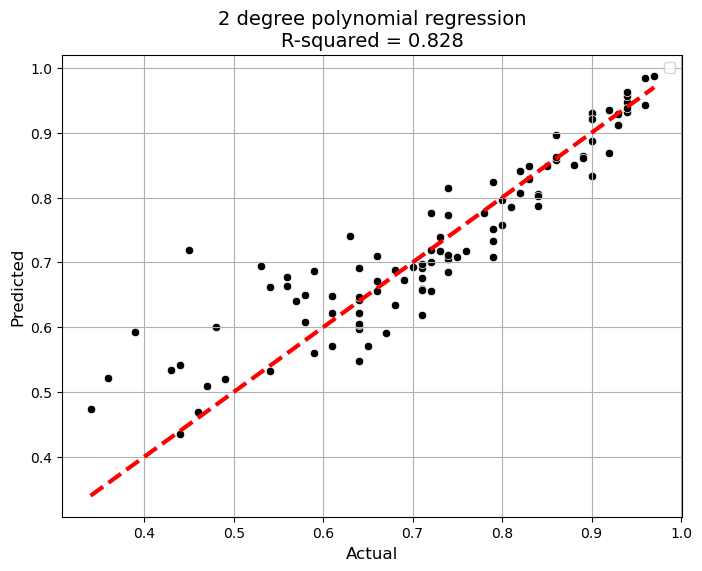

In [47]:
r_squared = r2_score(test[target], test_preds)

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test[target], y=test_preds, color='black')
plt.title(f'2 degree polynomial regression\nR-squared = {r_squared:.3f}', fontsize=14)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)

# let us addd a grid and a 45-degree reference line
plt.grid(True)
plt.legend(fontsize=10)
plt.plot([min(test[target]), max(test[target])], [min(test[target]), max(test[target])], 'r--', linewidth=3)
plt.show()


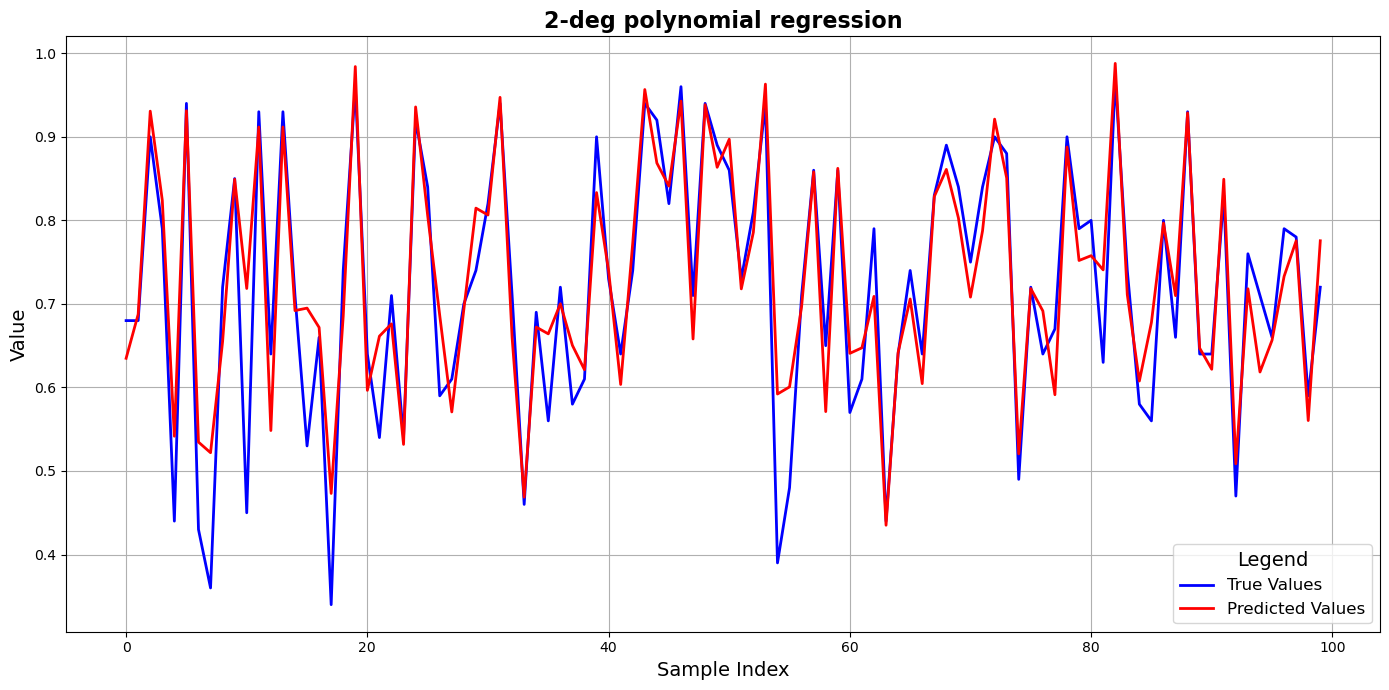

In [48]:
# Plot true values vs predicted values lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(x=range(test.shape[0]), y=test[target], color='blue', label='True Values', linewidth=2)
sns.lineplot(x=range(test.shape[0]), y=test_preds, color='red', label='Predicted Values', linewidth=2)
plt.title('2-deg polynomial regression', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Legend', fontsize=12, title_fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


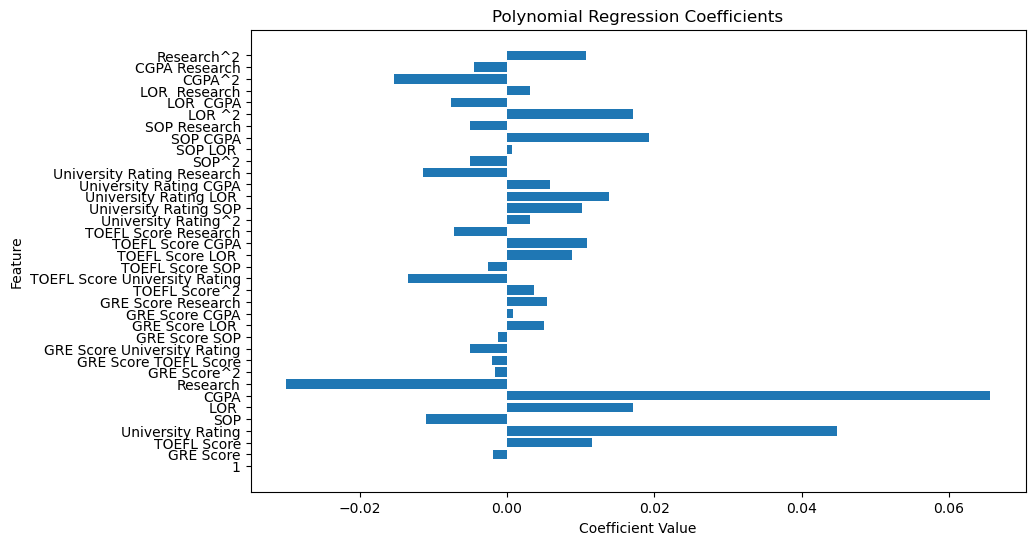

In [50]:
# Extract coefficients
model = pipeline.named_steps['model']
coefficients = model.coef_
feature_names = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Polynomial Regression Coefficients')
plt.show()

# Permutation Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

In [60]:
import sklearn

In [63]:
importances.sum()

0.10665612502589422

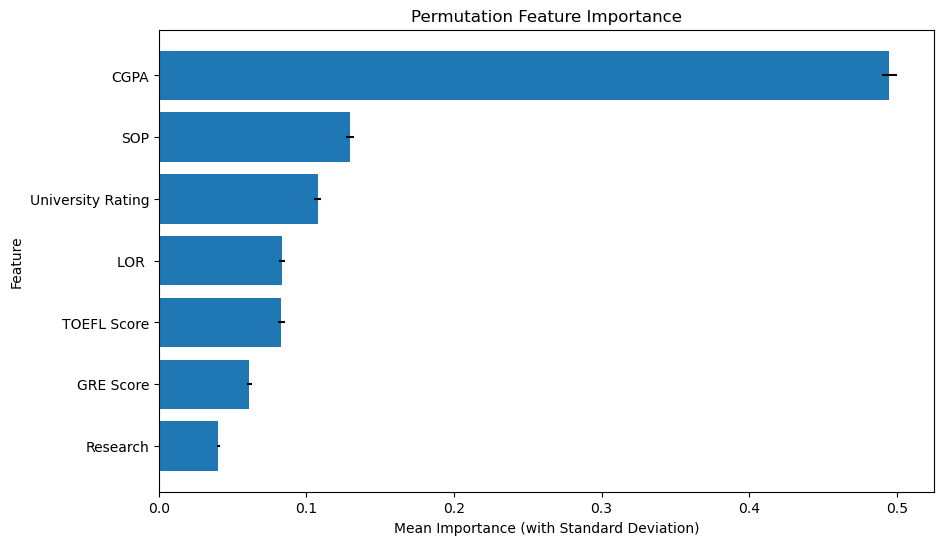

In [65]:
result = permutation_importance(pipeline, test[features], test[target], n_repeats=100, random_state=42, scoring='neg_mean_absolute_error')

# Extract feature importances and sort them
importances = result.importances_mean

importances = importances / np.sum(importances)

std = result.importances_std
features = test[features].columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(range(len(features)), importances[indices], xerr=std[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Mean Importance (with Standard Deviation)")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()

# Saving the polynomial regression pipeline

In [47]:
import pickle

# Save the pipeline to a file
with open('poly_regression_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [48]:
# Load the pipeline from the file
with open('poly_regression_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

In [49]:
evaluate_regression_model(test[target], loaded_pipeline.predict(test[features]))

,Metric,Value
0,R² Score,0.827844
1,Mean Squared Error (MSE),0.004064
2,Mean Absolute Error (MAE),0.044439
3,Root Mean Squared Error (RMSE),0.063749


In [50]:
a_single_sample = test.iloc[[44]][features]
a_single_sample

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
82,320,110,5,5.0,4.5,9.22,1


In [51]:
print("Predicted chance of admit for this applicant: ", loaded_pipeline.predict(a_single_sample))

Predicted chance of admit for this applicant:  [0.86864457]


# TESTING

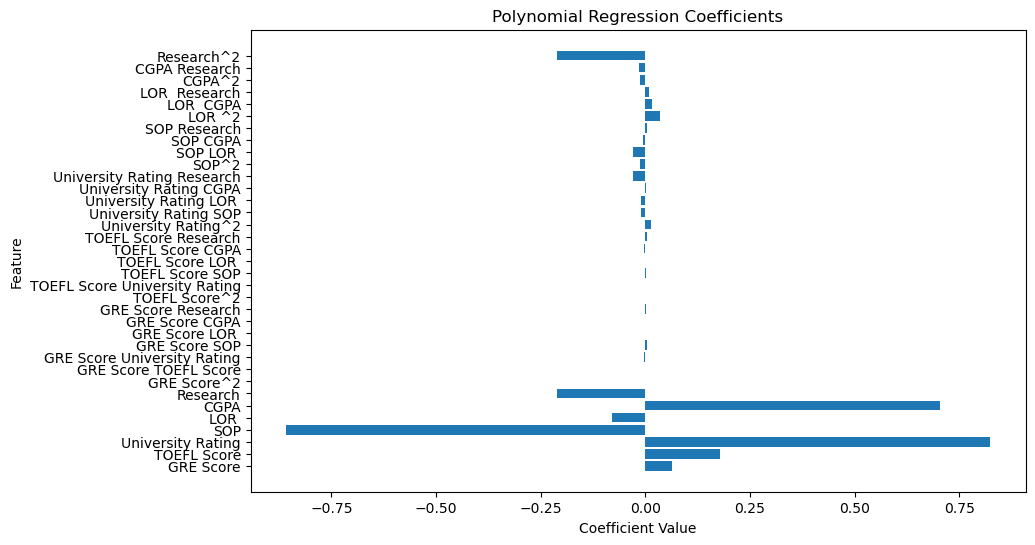

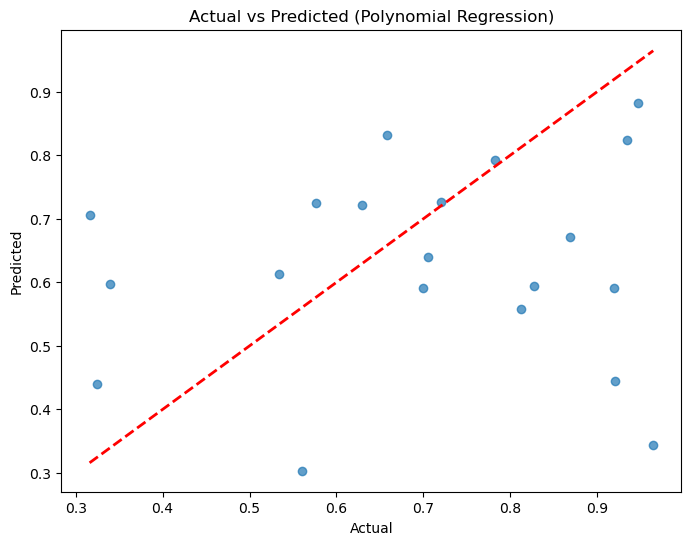

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Assuming the DataFrame `df` is already loaded and contains the necessary data
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'GRE Score': np.random.randint(290, 340, 100),
    'TOEFL Score': np.random.randint(90, 120, 100),
    'University Rating': np.random.randint(1, 5, 100),
    'SOP': np.random.uniform(1, 5, 100),
    'LOR ': np.random.uniform(1, 5, 100),
    'CGPA': np.random.uniform(6, 10, 100),
    'Research': np.random.randint(0, 2, 100),
    'Admit Chance': np.random.uniform(0.3, 1, 100)
})

# Features and target
X = df.drop('Admit Chance', axis=1)
y = df['Admit Chance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)

# Extract coefficients
model = pipeline.named_steps['linear_regression']
coefficients = model.coef_
feature_names = pipeline.named_steps['poly_features'].get_feature_names_out(X.columns)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Polynomial Regression Coefficients')
plt.show()

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Scatter plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()
